<a href="https://colab.research.google.com/github/Domaakshithareddy/Fruit-Quality-Identification/blob/main/Fruit_Quality_Identification_with_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Add these imports to your existing imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
import zipfile
import os
import shutil
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import random
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akshithawork","key":"2a8a58f04b0f76977865a2f20916dd83"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ryandpark/fruit-quality-classification

Dataset URL: https://www.kaggle.com/datasets/ryandpark/fruit-quality-classification
License(s): CC0-1.0


In [ ]:
dataset_path = "fruit-quality-classification.zip"
extract_path = "fruit_quality_data"

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)
directories = [
    "fruit_quality_data/Bad Quality_Fruits/Apple_Bad",
    "fruit_quality_data/Bad Quality_Fruits/Banana_Bad",
    "fruit_quality_data/Bad Quality_Fruits/Guava_Bad",
    "fruit_quality_data/Bad Quality_Fruits/Lime_Bad",
    "fruit_quality_data/Bad Quality_Fruits/Orange_Bad",
    "fruit_quality_data/Bad Quality_Fruits/Pomegranate_Bad",
    "fruit_quality_data/Good Quality_Fruits/Apple_Good",
    "fruit_quality_data/Good Quality_Fruits/Banana_Good",
    "fruit_quality_data/Good Quality_Fruits/Guava_Good",
    "fruit_quality_data/Good Quality_Fruits/Lime_Good",
    "fruit_quality_data/Good Quality_Fruits/Orange_Good",
    "fruit_quality_data/Good Quality_Fruits/Pomegranate_Good",
    "fruit_quality_data/Mixed Qualit_Fruits/Apple",
    "fruit_quality_data/Mixed Qualit_Fruits/Banana",
    "fruit_quality_data/Mixed Qualit_Fruits/Guava",
    "fruit_quality_data/Mixed Qualit_Fruits/Lemon",
    "fruit_quality_data/Mixed Qualit_Fruits/Orange",
    "fruit_quality_data/Mixed Qualit_Fruits/Pomegranate",
]

total=0
for directory in directories:
    if os.path.exists(directory):
        num_images = len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])
        print(f"Number of images in '{directory}': {num_images}")
        total+=num_images
    else:
        print(f"Directory '{directory}' does not exist.")
print(total)
original_dataset_dir = "fruit_quality_data"
dataset_dir = "dataset"
categories = ["Bad Quality_Fruits", "Good Quality_Fruits", "Mixed Qualit_Fruits"]

train_ratio, val_ratio = 0.7, 0.2

for category in categories:
    category_path = os.path.join(original_dataset_dir, category)
    images = []
    for fruit_type in os.listdir(category_path):
        fruit_path = os.path.join(category_path, fruit_type)
        if os.path.isdir(fruit_path):
            fruit_images = [os.path.join(fruit_path, img) for img in os.listdir(fruit_path)]
            images.extend(fruit_images)

    train_images, temp_images = train_test_split(images, train_size=train_ratio, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

    def move_images(image_list, destination):
        os.makedirs(destination, exist_ok=True)
        for img_path in image_list:
            if os.path.exists(img_path):
                new_filename = os.path.basename(os.path.dirname(img_path)) + "_" + os.path.basename(img_path)
                shutil.copy(img_path, os.path.join(destination, new_filename))

    move_images(train_images, os.path.join(dataset_dir, "train", category))
    move_images(val_images, os.path.join(dataset_dir, "val", category))
    move_images(test_images, os.path.join(dataset_dir, "test", category))
directories = [
    "dataset/train/Bad Quality_Fruits",
    "dataset/train/Good Quality_Fruits",
    "dataset/train/Mixed Qualit_Fruits",
    "dataset/test/Bad Quality_Fruits",
    "dataset/test/Good Quality_Fruits",
    "dataset/test/Mixed Qualit_Fruits",
    "dataset/val/Bad Quality_Fruits",
    "dataset/val/Good Quality_Fruits",
    "dataset/val/Mixed Qualit_Fruits"
]
total=0
for directory in directories:
    if os.path.exists(directory):
        num_images = len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])
        print(f"Number of images in '{directory}': {num_images}")
        total+=num_images
    else:
        print(f"Directory '{directory}' does not exist.")
print(total)

Number of images in 'fruit_quality_data/Bad Quality_Fruits/Apple_Bad': 1141
Number of images in 'fruit_quality_data/Bad Quality_Fruits/Banana_Bad': 1087
Number of images in 'fruit_quality_data/Bad Quality_Fruits/Guava_Bad': 1129
Number of images in 'fruit_quality_data/Bad Quality_Fruits/Lime_Bad': 1085
Number of images in 'fruit_quality_data/Bad Quality_Fruits/Orange_Bad': 1159
Number of images in 'fruit_quality_data/Bad Quality_Fruits/Pomegranate_Bad': 1187
Number of images in 'fruit_quality_data/Good Quality_Fruits/Apple_Good': 1149
Number of images in 'fruit_quality_data/Good Quality_Fruits/Banana_Good': 1113
Number of images in 'fruit_quality_data/Good Quality_Fruits/Guava_Good': 1152
Number of images in 'fruit_quality_data/Good Quality_Fruits/Lime_Good': 1094
Number of images in 'fruit_quality_data/Good Quality_Fruits/Orange_Good': 1216
Number of images in 'fruit_quality_data/Good Quality_Fruits/Pomegranate_Good': 5940
Number of images in 'fruit_quality_data/Mixed Qualit_Fruits/Ap

Found 13666 images belonging to 3 classes.
Found 2929 images belonging to 3 classes.
Found 2931 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


428/428 ━━━━━━━━━━━━━━━━━━━━ 289s 676ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 51s 556ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 51s 560ms/step

KNN Results:
Accuracy: 0.9345
Classification Report:
                     precision    recall  f1-score   support

 Bad Quality_Fruits       0.92      0.96      0.94      1019
Good Quality_Fruits       0.95      0.95      0.95      1750
Mixed Qualit_Fruits       0.88      0.61      0.72       162

           accuracy                           0.93      2931
          macro avg       0.92      0.84      0.87      2931
       weighted avg       0.93      0.93      0.93      2931



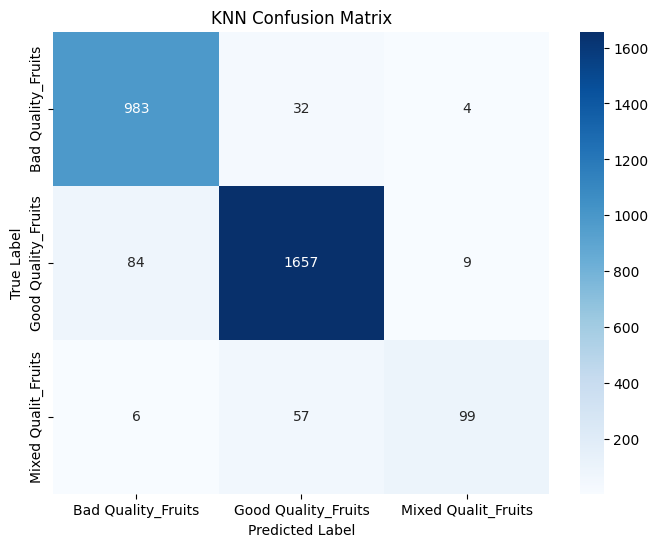


Logistic Regression Results:
Accuracy: 0.9464
Classification Report:
                     precision    recall  f1-score   support

 Bad Quality_Fruits       0.94      0.95      0.94      1019
Good Quality_Fruits       0.96      0.97      0.96      1750
Mixed Qualit_Fruits       0.85      0.69      0.76       162

           accuracy                           0.95      2931
          macro avg       0.92      0.87      0.89      2931
       weighted avg       0.95      0.95      0.95      2931



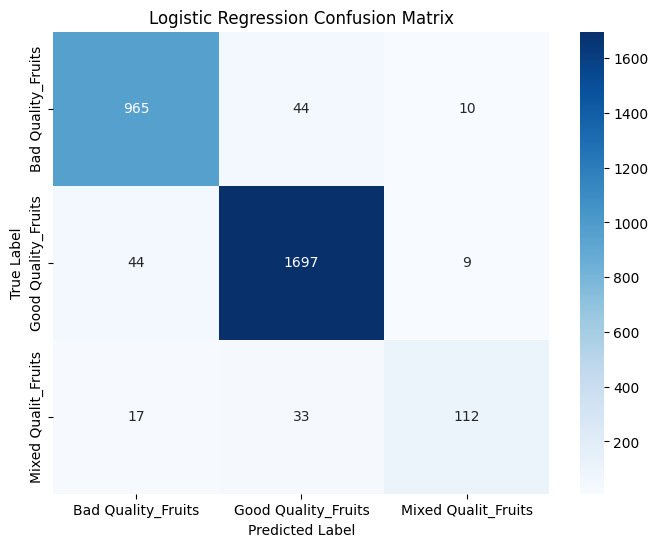


MLP Results:
Accuracy: 0.9666
Classification Report:
                     precision    recall  f1-score   support

 Bad Quality_Fruits       0.98      0.96      0.97      1019
Good Quality_Fruits       0.98      0.98      0.98      1750
Mixed Qualit_Fruits       0.81      0.88      0.84       162

           accuracy                           0.97      2931
          macro avg       0.92      0.94      0.93      2931
       weighted avg       0.97      0.97      0.97      2931



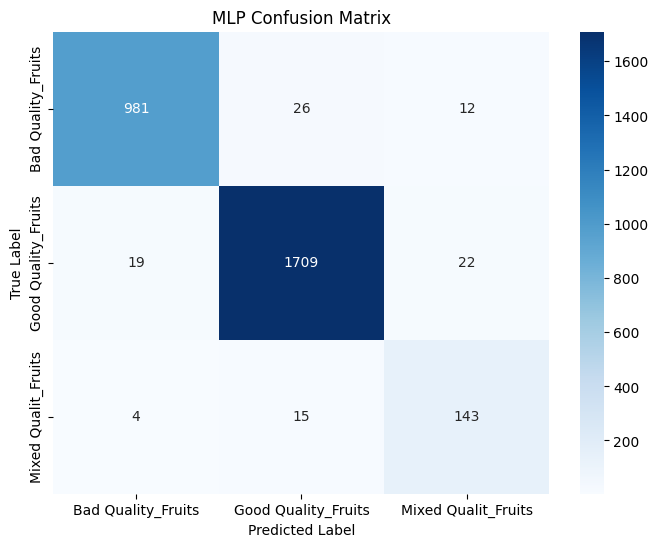


Random Forest Results:
Accuracy: 0.9512
Classification Report:
                     precision    recall  f1-score   support

 Bad Quality_Fruits       0.98      0.95      0.97      1019
Good Quality_Fruits       0.93      0.99      0.96      1750
Mixed Qualit_Fruits       0.92      0.51      0.65       162

           accuracy                           0.95      2931
          macro avg       0.95      0.82      0.86      2931
       weighted avg       0.95      0.95      0.95      2931



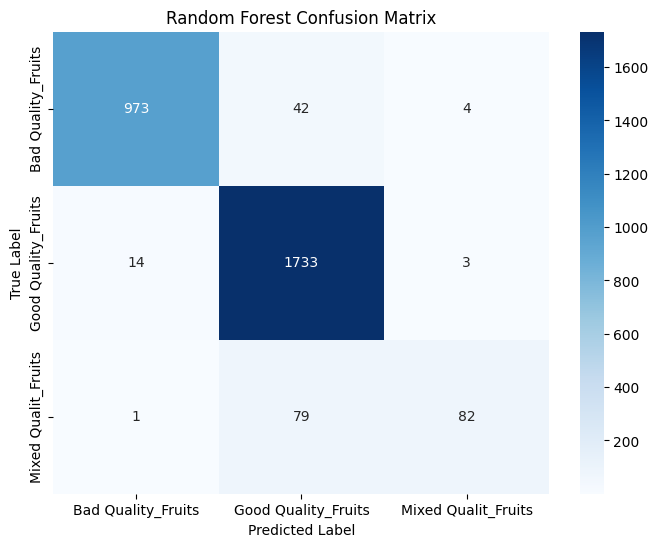


SVM Results:
Accuracy: 0.9092
Classification Report:
                     precision    recall  f1-score   support

 Bad Quality_Fruits       0.92      0.89      0.90      1019
Good Quality_Fruits       0.91      0.96      0.93      1750
Mixed Qualit_Fruits       0.83      0.49      0.62       162

           accuracy                           0.91      2931
          macro avg       0.89      0.78      0.82      2931
       weighted avg       0.91      0.91      0.91      2931



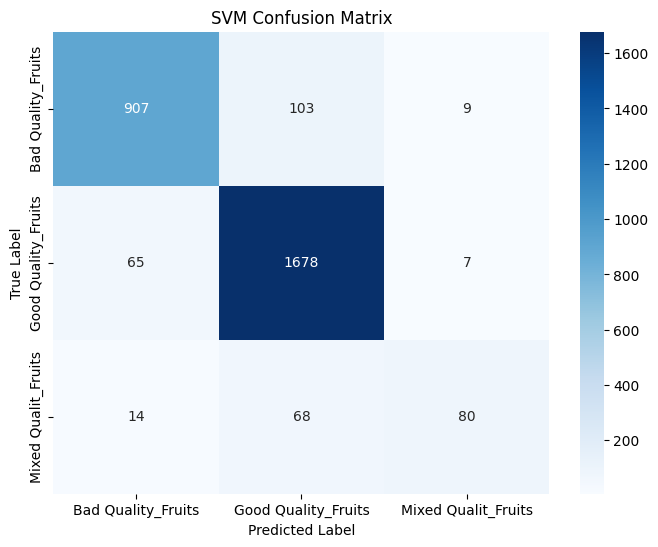

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:47:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
Accuracy: 0.9666
Classification Report:
                     precision    recall  f1-score   support

 Bad Quality_Fruits       0.99      0.96      0.98      1019
Good Quality_Fruits       0.96      0.99      0.97      1750
Mixed Qualit_Fruits       0.87      0.77      0.82       162

           accuracy                           0.97      2931
          macro avg       0.94      0.91      0.92      2931
       weighted avg       0.97      0.97      0.97      2931



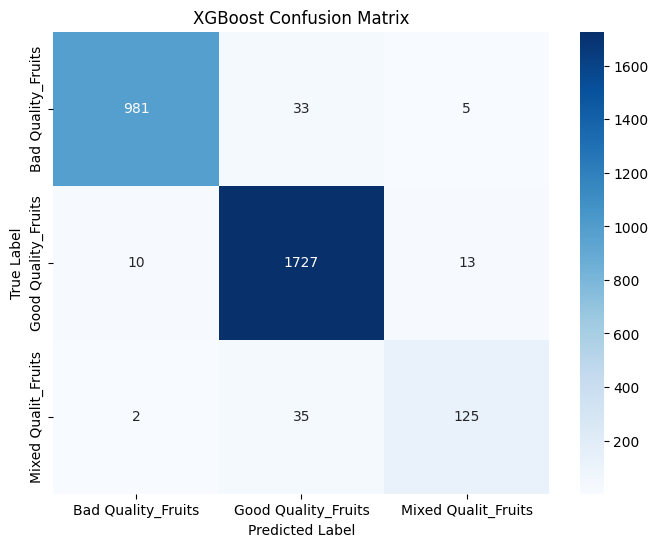


Performance Summary:
KNN: 0.9345
Logistic Regression: 0.9464
MLP: 0.9666
Random Forest: 0.9512
SVM: 0.9092
XGBoost: 0.9666


In [ ]:
def create_feature_extractor():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten()
    ])
    return model

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

validation_generator = test_datagen.flow_from_directory(
    'dataset/val',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

feature_extractor = create_feature_extractor()
train_features = feature_extractor.predict(train_generator)
validation_features = feature_extractor.predict(validation_generator)
test_features = feature_extractor.predict(test_generator)

train_labels = train_generator.classes
validation_labels = validation_generator.classes
test_labels = test_generator.classes

classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='rbf'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

results = {}
for name, clf in classifiers.items():
    clf.fit(train_features, train_labels)
    test_pred = clf.predict(test_features)
    accuracy = accuracy_score(test_labels, test_pred)
    results[name] = accuracy

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(test_labels, test_pred,
                              target_names=test_generator.class_indices.keys()))

    cm = confusion_matrix(test_labels, test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=test_generator.class_indices.keys(),
                yticklabels=test_generator.class_indices.keys())
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

print("\nPerformance Summary:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")